Задание
Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
Cохранить результаты в pandas dataframe

Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных: -- Привести колонки датафрейма к одному типу данных -- Проверить индекс, чтобы он соответствовал порядку строк -- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки

Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов. -- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. -- Рассчитать объемы вводимого жилья по регионам и по годам. -- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах -- Визуализировать разброс, связь и распределение этих показателей по регионам -- Сделать выводы по каждому из расчетов и графиков

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#Подгружаем наш датафрейм
fileName = 'stop_loc.xlsx'
df = pd.read_excel(fileName)

In [3]:
df.head(5)

,Unnamed: 0,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,0,13383,28105,72,г Тюмень,4.0,20,68,2022-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6.0,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,13399,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1.0,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,13398,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7.0,10,43,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,13391,28101,72,"г Тюмень, ул Профсоюзная",3.0,12,44,2022-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10558 entries, 0 to 10557
Columns: 109 entries, Unnamed: 0 to metro.colors
dtypes: bool(2), float64(33), int64(32), object(42)
memory usage: 8.6+ MB


In [5]:
df.shape

(10558, 109)

In [6]:
df.describe(include = "all")

,Unnamed: 0,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
count,10558.0,10558.000000,10558.000000,10558.000000,10531,10556.000000,10558.000000,10558.000000,10558,10558,...,102,102,102,1.000,1,1,1,1.00,1.0,1
unique,NaN,NaN,NaN,NaN,8416,NaN,NaN,NaN,59,6,...,4,4,42,NaN,1,1,1,NaN,NaN,1
top,NaN,NaN,NaN,NaN,г Санкт-Петербург,NaN,NaN,NaN,2022-12-31,Монолит-кирпич,...,Сообщение о судебном акте. О признании должник...,http://www.consultant.ru/document/cons_doc_LAW...,21-06-2019 17:49,NaN,Золотая нива,Дзержинская,#0A6F20,NaN,NaN,['#0A6F20']
freq,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,1990,5481,...,78,78,14,NaN,1,1,1,NaN,NaN,1
mean,0.0,38258.011176,393652.413809,48.692934,NaN,10.494600,12.504641,190.201459,NaN,NaN,...,NaN,NaN,NaN,53.306,NaN,NaN,NaN,38.25,0.0,NaN
std,0.0,9863.423841,192337.246005,23.172307,NaN,7.758583,8.421822,236.024711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,1259.000000,172.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,53.306,NaN,NaN,NaN,38.25,0.0,NaN
25%,0.0,35847.250000,273293.000000,26.000000,NaN,4.000000,5.000000,40.000000,NaN,NaN,...,NaN,NaN,NaN,53.306,NaN,NaN,NaN,38.25,0.0,NaN
50%,0.0,41537.500000,464844.500000,50.000000,NaN,9.000000,11.000000,124.000000,NaN,NaN,...,NaN,NaN,NaN,53.306,NaN,NaN,NaN,38.25,0.0,NaN
75%,0.0,44890.500000,540399.000000,71.000000,NaN,16.000000,18.000000,254.000000,NaN,NaN,...,NaN,NaN,NaN,53.306,NaN,NaN,NaN,38.25,0.0,NaN


In [7]:
#Проверить индекс, чтобы он соответствовал порядку строк
df.index.is_unique

True

In [8]:
#Привести колонки датафрейма к одному типу данных
df=df.apply(pd.to_numeric, errors='ignore')

In [9]:
df.dtypes

Unnamed: 0        int64
id                int64
pdId              int64
region            int64
address          object
                 ...   
metro.line       object
metro.color      object
metro.time      float64
metro.isWalk    float64
metro.colors     object
Length: 109, dtype: object

# Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.

In [10]:
#нужные столбцы
df0=df[['developer.regRegionDesc','objPriceAvg']]

In [11]:
#проверка на наличие пустот
df[['developer.regRegionDesc','objPriceAvg']].isna().sum()
df[['developer.regRegionDesc','objPriceAvg']].isnull().sum()

developer.regRegionDesc     119
objPriceAvg                3064
dtype: int64

In [12]:
#удаляем пустые строки
df1=df0.dropna()

In [13]:
#группировка
df2=df1.groupby("developer.regRegionDesc").agg(avg_price = ("objPriceAvg","mean"))

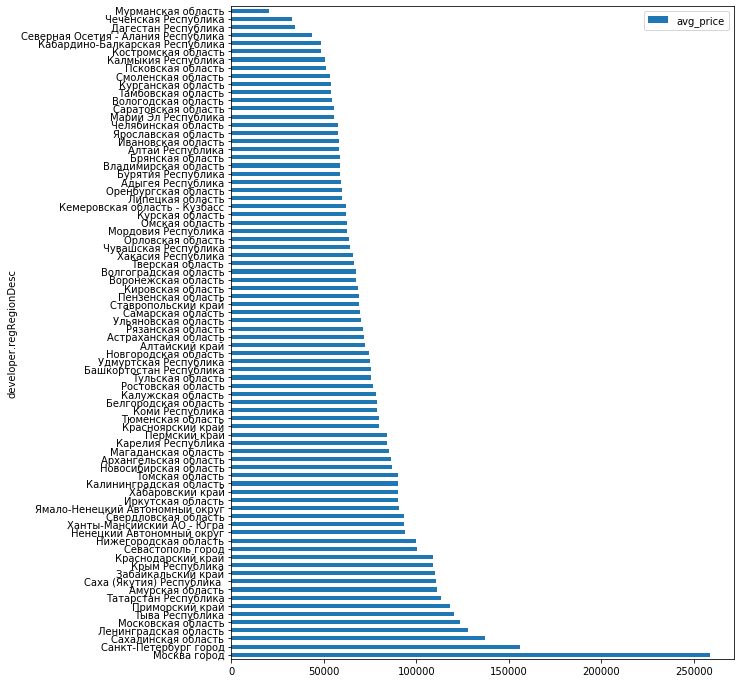

In [14]:
#рисуем график
from pylab import rcParams
rcParams['figure.figsize'] = 9,12
df2.sort_values(by='avg_price',ascending=False).plot(kind='barh')
plt.show()

Вывод: Средние цены за квадратный метр по регионам предсказуемы: наиболее высокая цена в г. Москва и Спб и соответствующих областях, самый дешевый метр квадратный оказался в ЧР. Среди лидеров также окзалась Сахалинская область и Республика Тыва.

# Рассчитать объемы вводимого жилья по регионам и по годам.

In [20]:
#нужные столбцы
df_1=df[['developer.regRegionDesc','objReady100PercDt','objSquareLiving']]

In [21]:
#отчистка
df_2=df_1.dropna()

In [37]:
#обрезаем дату до года
dt=df_1['objReady100PercDt'].str.split('-', n = 3, expand = True)
df_1['year'] = dt[0].str.strip(" ")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
#группировка
df_2=df_1.groupby(["year","developer.regRegionDesc"],as_index=False).agg(avg_S = ("objSquareLiving","sum"))

In [149]:
df_2

,year,developer.regRegionDesc,avg_S
0,2017,Краснодарский край,2033.00
1,2017,Московская область,24389.40
2,2018,Пермский край,11648.00
3,2018,Тюменская область,1468.14
4,2019,Красноярский край,1197.00
...,...,...,...
415,2034,Свердловская область,5843.92
416,2036,Рязанская область,23702.19
417,2036,Свердловская область,11203.20
418,2038,Свердловская область,8765.88


In [154]:
#Отсортируем
df_3=df_2.sort_values(['year','avg_S',], ascending=[False, False])

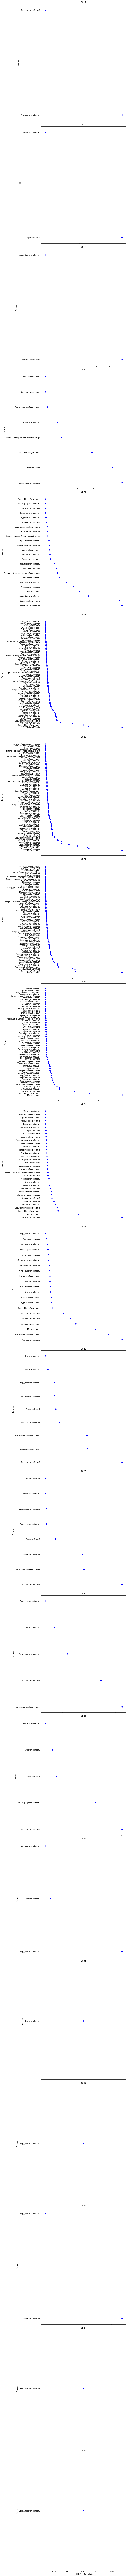

In [159]:
#график в матплотлиб
fig, axes = plt.subplots(nrows=21,ncols=1,figsize=(10,200))

for i, (name, group) in enumerate(df_3.groupby('year')):
    axes = axes.flatten()
    axes[i].scatter(group['avg_S'],group['developer.regRegionDesc'], color ='blue')
    axes[i].set_title(name)
    axes[i].set(xlabel='Вводимая площадь', ylabel='Регион')
    axes[i].label_outer()
    
fig.tight_layout()  

In [161]:
#видим, что года с 2030 явно лишние (бессмысленные для аналитики), можно удалить их
df_3.drop(df_3[df_3['year'] == '2030'].index, inplace=True)
df_3.drop(df_3[df_3['year'] == '2031'].index, inplace=True)
df_3.drop(df_3[df_3['year'] == '2032'].index, inplace=True)
df_3.drop(df_3[df_3['year'] == '2033'].index, inplace=True)
df_3.drop(df_3[df_3['year'] == '2034'].index, inplace=True)
df_3.drop(df_3[df_3['year'] == '2035'].index, inplace=True)
df_3.drop(df_3[df_3['year'] == '2036'].index, inplace=True)
df_3.drop(df_3[df_3['year'] == '2037'].index, inplace=True)
df_3.drop(df_3[df_3['year'] == '2038'].index, inplace=True)
df_3.drop(df_3[df_3['year'] == '2039'].index, inplace=True)

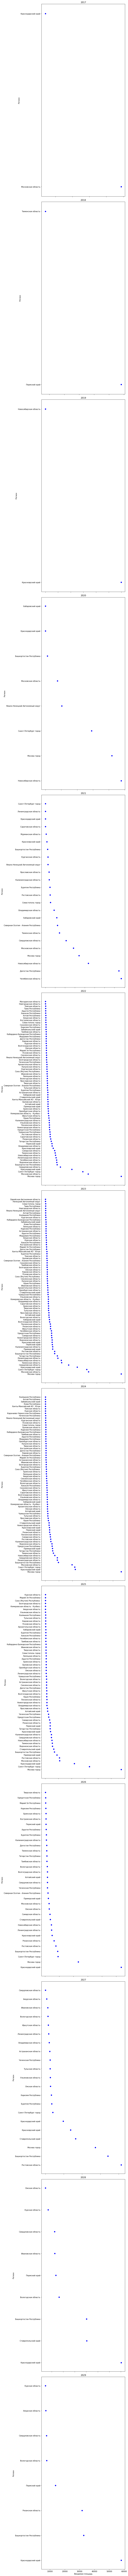

In [178]:
#график в матплотлиб
fig, axes = plt.subplots(nrows=13,ncols=1,figsize=(10,200))

for i, (name, group) in enumerate(df_3.groupby('year')):
    axes = axes.flatten()
    axes[i].scatter(group['avg_S'],group['developer.regRegionDesc'], color ='blue')
    axes[i].set_title(name)
    axes[i].set(xlabel='Вводимая площадь', ylabel='Регион')
    axes[i].label_outer()
    
fig.tight_layout()  

Вывод: в 2021 году лидером по вводу жилья была Челябинская область и Республика Дагестан, в 2022 в лидеры вышел столичный регион. Меньше всего жилья вводится в Магаданской и Новгородких областях

# Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах

In [262]:
df_a1=df[['developer.regRegionDesc','objFloorCnt','objFlatCnt','objFlatSq','objElemParkingCnt','objPriceAvg']]

In [263]:
df_a1

,developer.regRegionDesc,objFloorCnt,objFlatCnt,objFlatSq,objElemParkingCnt,objPriceAvg
0,Тюменская область,20,68,6293.78,31,53109.0
1,Тюменская область,12,65,6248.51,0,45523.0
2,Тюменская область,1,0,0.00,125,50768.0
3,Тюменская область,10,43,4812.98,0,47886.0
4,Тюменская область,12,44,4297.44,41,55893.0
...,...,...,...,...,...,...
10553,Московская область,26,312,14788.80,0,85610.0
10554,Московская область,26,288,14870.40,0,85604.0
10555,Московская область,26,312,14872.80,0,85634.0
10556,Ярославская область,6,127,6764.22,0,69916.0


In [229]:
#создаем датафреймы
df_fl=df[['developer.regRegionDesc','objFloorCnt']]
df_cou=df[['developer.regRegionDesc','objFlatCnt']]
df_Sq=df[['developer.regRegionDesc','objFlatSq']]
df_park=df[['developer.regRegionDesc','objElemParkingCnt']]
df_price=df[['developer.regRegionDesc','objPriceAvg']]

In [233]:
#убираем нулевые значения
df_fl = df_fl.loc[df_fl['objFloorCnt'] != 0]
df_cou = df_cou.loc[df_cou['objFlatCnt'] != 0]
df_Sq = df_Sq.loc[df_Sq['objFlatSq'] != 0]
df_park = df_park.loc[df_park['objElemParkingCnt'] != 0]
df_price = df_price.loc[df_price['objPriceAvg'] != 0]

In [211]:
#фильтрация
#df_park1 = df_park1.loc[df_park1['objElemParkingCnt'] != 0]

In [215]:
#замена 0 на среднее
#df_park.replace(0,df_park1['objElemParkingCnt'].loc[df_park1['objElemParkingCnt'] != 0].mean())

,developer.regRegionDesc,objElemParkingCnt
0,Тюменская область,31.000000
1,Тюменская область,173.096467
2,Тюменская область,125.000000
3,Тюменская область,173.096467
4,Тюменская область,41.000000
...,...,...
10553,Московская область,173.096467
10554,Московская область,173.096467
10555,Московская область,173.096467
10556,Ярославская область,173.096467


In [290]:
#группируем
df_fl1=df_fl.groupby('developer.regRegionDesc').agg(  
    avg_floor = ("objFloorCnt","mean")
)
df_cou1=df_cou.groupby('developer.regRegionDesc').agg(  
    sum_kolvo = ("objFlatCnt","sum")
)
df_Sq1=df_Sq.groupby('developer.regRegionDesc').agg(  
    sum_sq = ("objFlatSq","sum")
)
df_park1=df_park.groupby('developer.regRegionDesc').agg(  
    sum_park = ("objElemParkingCnt","sum")
)
df_price1=df_price.groupby('developer.regRegionDesc').agg(  
    avg_price = ("objPriceAvg","mean")
)


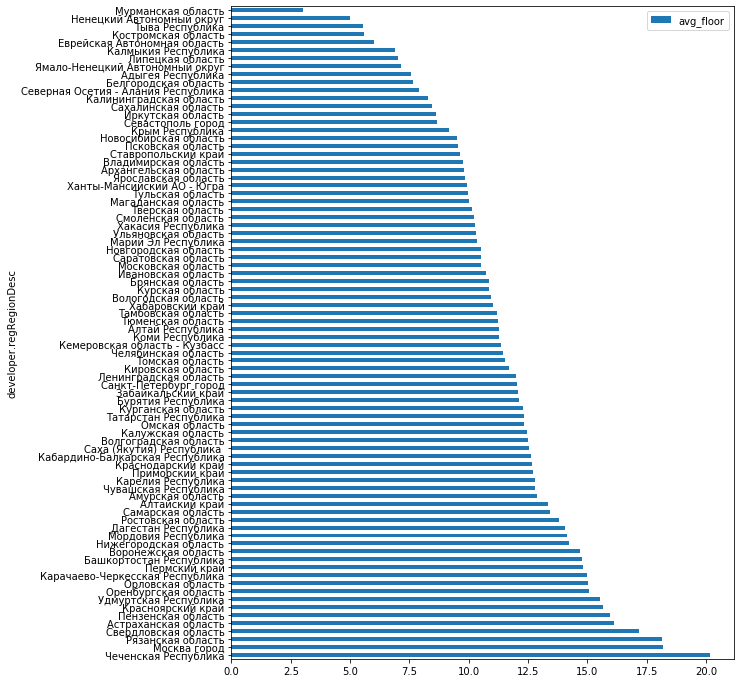

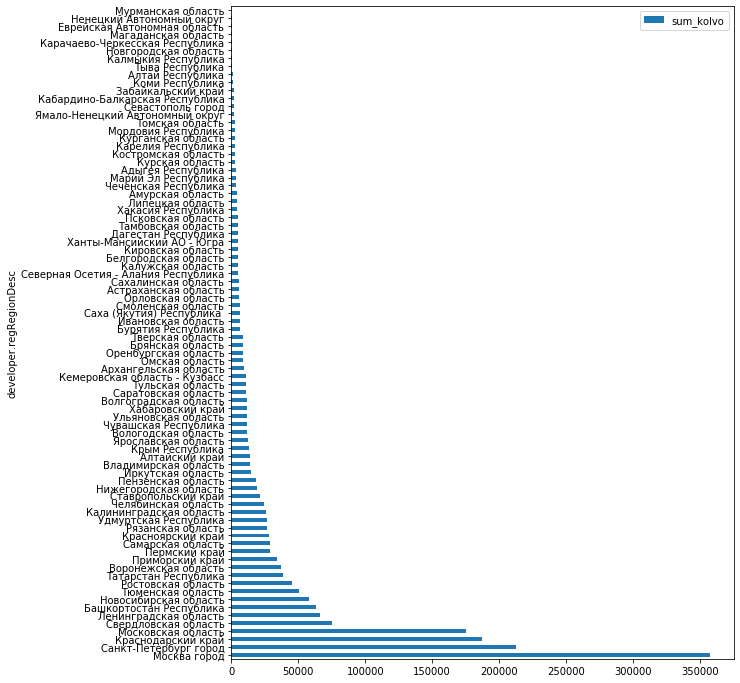

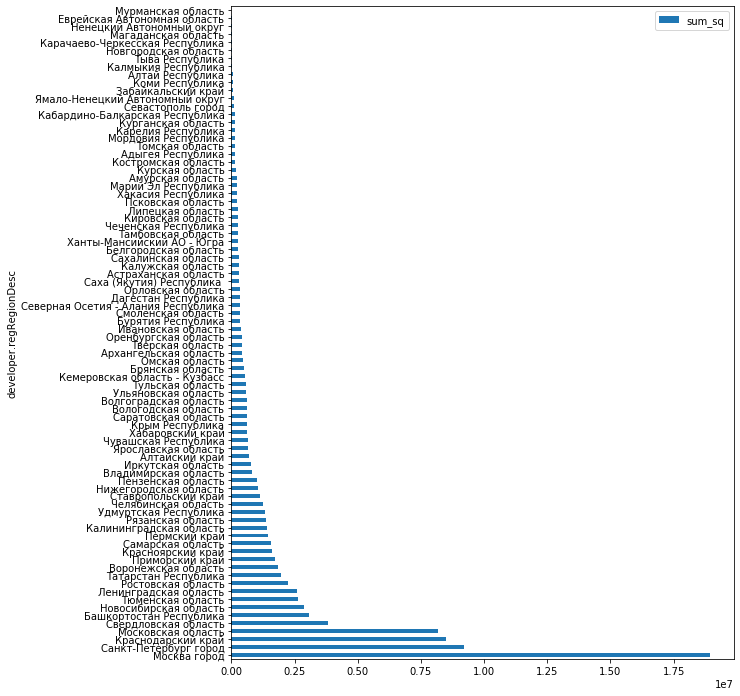

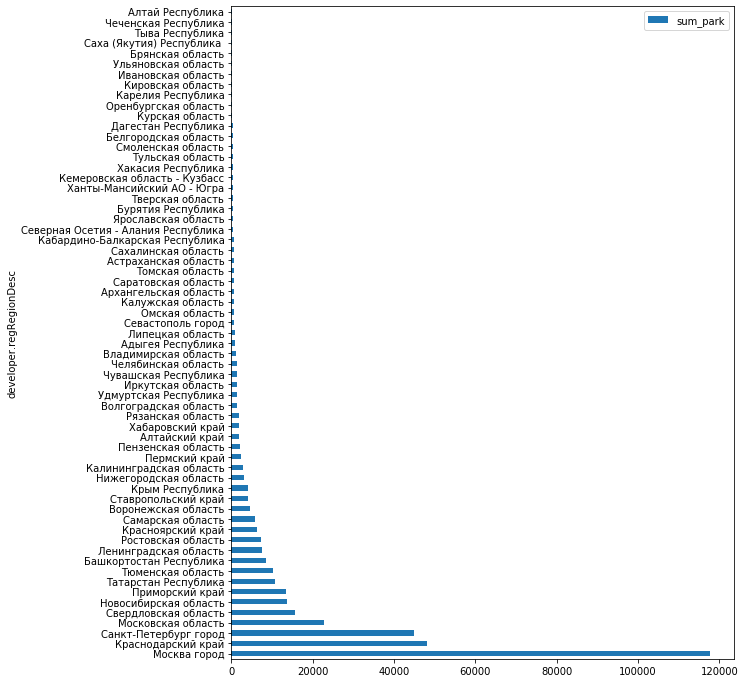

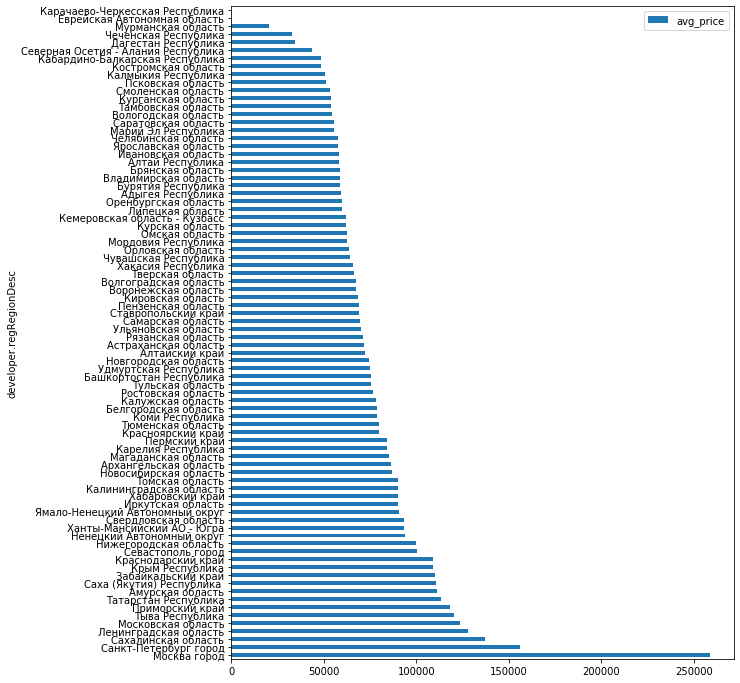

In [296]:
#рисуем графики сравнительные
rcParams['figure.figsize'] = 9,12
df_fl1.sort_values(by="avg_floor",ascending=False).plot(kind='barh')
df_cou1.sort_values(by="sum_kolvo",ascending=False).plot(kind='barh')
df_Sq1.sort_values(by="sum_sq",ascending=False).plot(kind='barh')
df_park1.sort_values(by="sum_park",ascending=False).plot(kind='barh')
df_price1.sort_values(by="avg_price",ascending=False).plot(kind='barh')
plt.show()

Вывод: 
Сравним регионы по пяти выбранным группам: самыми "высокими" новостройками застраивается Чеченская Республика и г. Москва (20 этажей), 3 этажные низкие дома распространены в Мурманской области и Ненецком АО. Больше всего квартир в количественном выражении строится в Мск и Спб, поэтому и парковочных мест там также создается больше. Средняя цена за квадратный метр самая высокая в г. Москве - более 250 т.р.

# Визуализировать разброс, связь и распределение этих показателей по регионам 

In [277]:
#Делаем одну большую таблицу
result=pd.merge(df_fl1, pd.merge(pd.merge(df_Sq1, pd.merge(df_price1, df_park1, how="left", on=["developer.regRegionDesc"]), how="left", on=["developer.regRegionDesc"]), df_cou1, how="left", on=["developer.regRegionDesc"]), how="left", on=["developer.regRegionDesc"])

In [279]:
#Удаляем нули
result1=result.fillna(0)

In [280]:
result1

,developer.regRegionDesc,avg_floor,sum_sq,avg_price,sum_park,avg_kolvo
0,Адыгея Республика,7.580645,155617.86,59364.150000,911.0,128.230769
1,Алтай Республика,11.272727,48379.05,58022.000000,68.0,86.090909
2,Алтайский край,13.318182,699492.00,72091.363636,1945.0,186.546667
3,Амурская область,12.882353,202282.03,111318.333333,0.0,115.500000
4,Архангельская область,9.806452,429910.07,86289.692308,579.0,158.065574
...,...,...,...,...,...,...
77,Челябинская область,11.422857,1239402.26,57510.766129,1263.0,143.270588
78,Чеченская Республика,20.153846,254907.92,32742.333333,103.0,264.153846
79,Чувашская Республика,12.797297,649267.84,63855.419355,1289.0,159.315068
80,Ямало-Ненецкий Автономный округ,7.153846,108131.60,90580.250000,0.0,85.653846


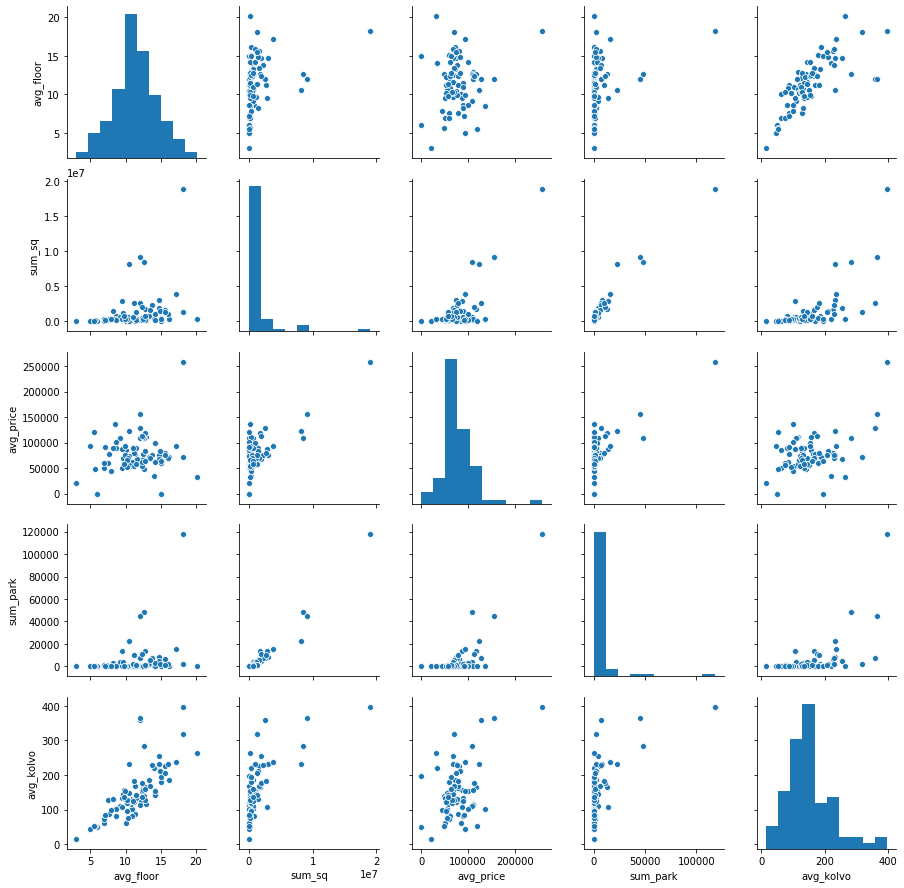

In [282]:
#cтроим диаграмму рассеяния
import seaborn as sns
sns.pairplot(result1[['avg_floor','sum_sq','avg_price','sum_park','avg_kolvo']])